In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
from sklearn.cross_validation import train_test_split

/Users/ajenkins/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
Train = pd.read_csv("Insight_Train_DC.csv")

In [3]:
Train.columns

Index([u'LB', u'AC', u'FM', u'UC', u'DL', u'DS', u'DP', u'ASTV', u'MSTV',
       u'ALTV', u'MLTV', u'Width', u'Min', u'Max', u'Nmax', u'Nzeros', u'Mode',
       u'Mean', u'Median', u'Variance', u'Tendency', u'NSP'],
      dtype='object')

In [4]:
Train.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.013,0.006,0.003,0,0,0,40,1.3,0,...,68,157,5,1,133,134,136,9,1,1
1,121,0.012,0.009,0.001,0,0,0,39,1.3,0,...,102,200,7,1,133,131,132,8,-1,1
2,121,0.011,0.007,0.001,0,0,0,39,1.3,0,...,68,200,8,1,133,132,134,8,0,1
3,121,0.011,0.005,0.002,0,0,0,39,1.2,0,...,68,154,7,1,133,133,135,8,1,1
4,125,0.008,0.000,0.000,0,0,0,41,1.2,0,...,98,161,4,0,138,135,137,6,0,1


In [5]:
Train.NSP.value_counts()

1    1408
2     154
3     137
dtype: int64

In [6]:
Train.isnull().sum().sum()

54

In [7]:
Train = Train.fillna(0)

In [8]:
Only1 = Train[(Train.NSP == 1)]
len(Only1)

1408

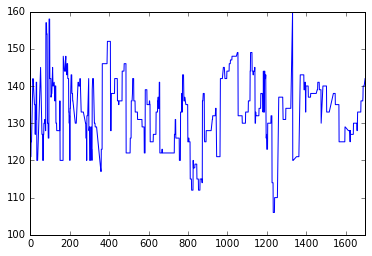

In [9]:
Only1.LB.plot()

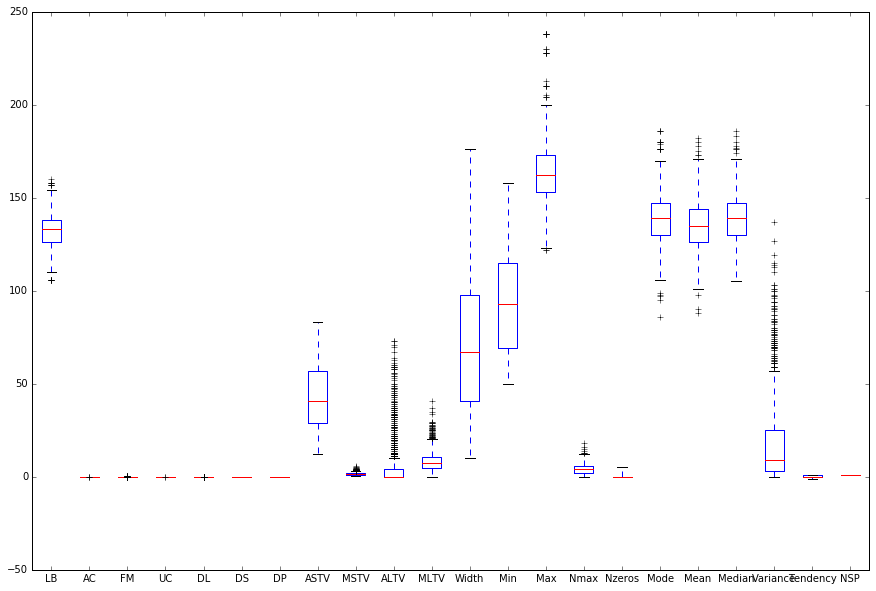

In [10]:
Only1.plot(kind = 'box',figsize=(15,10))

In [11]:
Features = Train.iloc[:,:-1]
Values = Train.iloc[:,-1]

In [12]:
Features_train, Features_test, Values_train, Values_test = train_test_split(Features, Values, test_size = 0.3, random_state = 34)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(Features_train, Values_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
clf.score(Features_test,Values_test)

0.92367906066536198

In [15]:
y_pred = clf.predict(Features_test)

In [16]:
from sklearn import metrics
###top is predicted, left is correct
metrics.confusion_matrix(Values_test,y_pred)

array([[428,   0,   5],
       [ 30,  13,   0],
       [  2,   2,  31]])

In [17]:
sample_weight = np.array([1 if i == 1 else 10 if i == 2 else 1 for i in Values_train])

In [18]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(Features_train, Values_train, sample_weight = sample_weight)
clf.score(Features_test,Values_test)

y_pred = clf.predict(Features_test)

print clf.score(Features_test,Values_test)

print metrics.confusion_matrix(Values_test,y_pred)

print clf.feature_importances_

0.960861056751
[[428   4   1]
 [ 11  31   1]
 [  3   0  32]]
[ 0.02210632  0.01441774  0.01112077  0.0239197   0.00943983  0.00163915
  0.01538705  0.1053515   0.03361134  0.07607804  0.03194242  0.04340093
  0.03393298  0.05091489  0.0155193   0.0069737   0.02418744  0.03898934
  0.03657306  0.02959668  0.00539783]


In [19]:
Test = pd.read_csv('Insight_Test_DC.csv')

In [20]:
TestFeatures = Test.iloc[:,:-1]
TestValues = Test.iloc[:,-1]



test_pred = clf.predict(TestFeatures)

print clf.score(TestFeatures,TestValues)

print metrics.confusion_matrix(TestValues,test_pred)

0.903981264637
[[233  14   0]
 [ 22 119   0]
 [  1   4  34]]


In [21]:
from sklearn import cross_validation
Full = pd.read_csv("Full_Data.csv")
Full_Train, Full_Test = StratifiedShuffleSplit(Full.NSP, n_iter = 2, test_size = 0.3)

NameError: name 'StratifiedShuffleSplit' is not defined

In [22]:
print len(Full_Train)
print len(Full_Test)

NameError: name 'Full_Train' is not defined